In [1]:
#Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
#Importing the data
data = pd.read_excel('online_retail_data.xlsx')

In [3]:
#Chcking first 5 rows of the data
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
'''

Note:
1. Invoice is the unique number for transactions.
2. If Invoice starts with 'C' it is a cancellation
3. StockCode is the unique ID for each Product
4. Description describes the product
5. Quantity: Number of pieces of each product
6. Price: Unit price in sterling
7. InvoiceDate is the date of the transaction

'''

"\n\nNote:\n1. Invoice is the unique number for transactions.\n2. If Invoice starts with 'C' it is a cancellation\n3. StockCode is the unique ID for each Product\n4. Description describes the product\n5. Quantity: Number of pieces of each product\n6. Price: Unit price in sterling\n7. InvoiceDate is the date of the transaction\n\n"

In [5]:
#Frequency of the first character within Invoice
frequency = dict(collections.Counter([str(x)[0] for x in list(set(data['Invoice']))]))
frequency

{'5': 18960, 'C': 4592, 'A': 3, '4': 5261}

In [6]:
#C stands for cancellation
frequency['C']

4592

The orange represents the cancelled orders


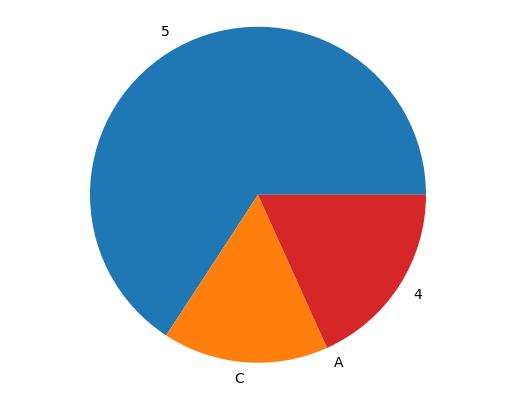

In [7]:
print("The orange represents the cancelled orders")
plt.pie(list(frequency.values()), labels=list(frequency.keys()))
plt.axis('equal')
plt.show()

In [8]:
print("Unique transactions")
data['Invoice'].nunique()

Unique transactions


28816

In [9]:
data.groupby('Invoice')['StockCode'].count()

Invoice
489434      8
489435      4
489436     19
489437     23
489438     17
           ..
C538121     1
C538122     1
C538123     3
C538124     3
C538164     1
Name: StockCode, Length: 28816, dtype: int64

In [10]:
data['Invoice_Type'] = [str(x)[0] for x in list(data['Invoice'])]

In [11]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,4


In [20]:
test = dict(data.groupby('Invoice_Type')['StockCode'].nunique())

AttributeError: 'dict' object has no attribute 'fillna'

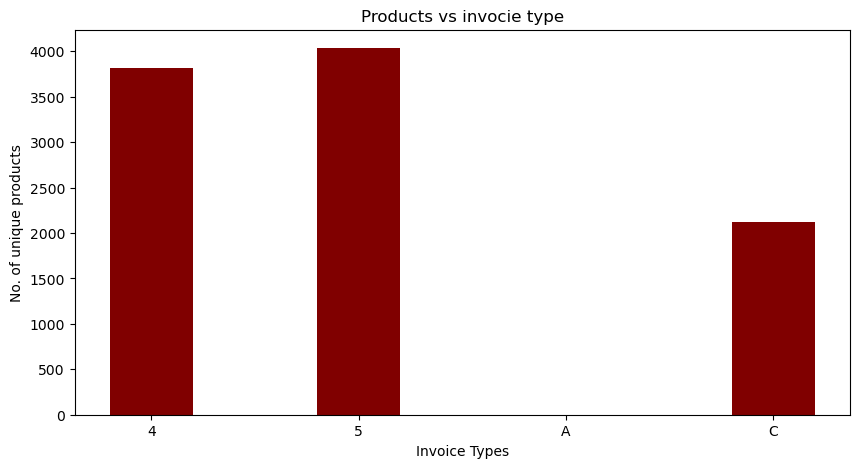

In [13]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(list(test.keys()),list(test.values()),color ='maroon',
        width = 0.4)
 
plt.xlabel("Invoice Types")
plt.ylabel("No. of unique products")
plt.title("Products vs invocie type")
plt.show()

In [14]:
data.loc[data['Invoice_Type']=='C']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Type
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,C
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,C
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,C
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,C
...,...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany,C
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom,C
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,C
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom,C


In [15]:
#All analysis should be filterd out on country
#1. most popular products
#2. least popular product
#3. similar products based on description
#5. group customers that buy similar products and suggest what they can buy
#6. recommend quantity needed
#7. price evaluation on similar products 
#8. are prodicts with varieties more popular

In [16]:
#Which is the most popular product
data.loc[data['Country']=='United Kingdom'].groupby('StockCode')['Quantity'].sum().sort_values()

StockCode
20852    -18800
22126    -16400
10120     -8575
16235     -6533
C3        -4999
          ...  
85099B    43374
21212     46985
17003     47495
84077     51434
85123A    51755
Name: Quantity, Length: 4631, dtype: int64

In [17]:
data.loc[data['StockCode']==20852]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Type
269554,515459,20852,given away,-1000,2010-07-12 15:46:00,0.0,NaN,United Kingdom,5
269555,515461,20852,given away,-1000,2010-07-12 15:46:00,0.0,NaN,United Kingdom,5
269556,515460,20852,given away,-1000,2010-07-12 15:46:00,0.0,NaN,United Kingdom,5
269558,515462,20852,given away,-7000,2010-07-12 15:47:00,0.0,NaN,United Kingdom,5
437008,531177,20852,Given away,-8800,2010-11-05 14:40:00,0.0,NaN,United Kingdom,5
